<a href="https://colab.research.google.com/github/pravinkr/stock-price-prediction/blob/master/TCS_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My\ Drive/MLProjects

stock-price-predictions  yolo


In [0]:
%cd /content/gdrive/My\ Drive/MLProjects

/content/gdrive/My Drive/MLProjects


In [0]:
!mkdir stock-price-predictions

mkdir: cannot create directory ‘stock-price-predictions’: File exists


In [0]:
%cd stock-price-predictions/

/content/gdrive/My Drive/MLProjects/stock-price-predictions


In [0]:
import pandas as pd

In [0]:
## For TCS stock prices
dataset = pd.read_csv('TCS-stock-prices.csv', index_col='Date',parse_dates=True) 



In [0]:
dataset.head

<bound method NDFrame.head of             Open Price  High Price  ...  Spread High-Low  Spread Close-Open
Date                                ...                                    
2004-08-25     1076.00     1080.00  ...           101.00             -88.50
2004-08-26      992.70      996.70  ...            21.40             -14.15
2004-08-27      982.45      982.45  ...            23.90             -20.10
2004-08-30      967.70      989.75  ...            24.75              18.55
2004-08-31      989.00      990.00  ...            14.00              -1.05
2004-09-01      988.50      994.90  ...            11.40              -0.70
2004-09-02      988.00     1004.85  ...            16.85               5.45
2004-09-03      996.00     1000.25  ...            10.50               1.95
2004-09-06      998.00     1004.85  ...            11.70              -3.00
2004-09-07      997.00     1000.00  ...             5.70              -1.65
2004-09-08      998.00     1000.00  ...             8.75  

In [0]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
#Data Cleaning
dataset.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

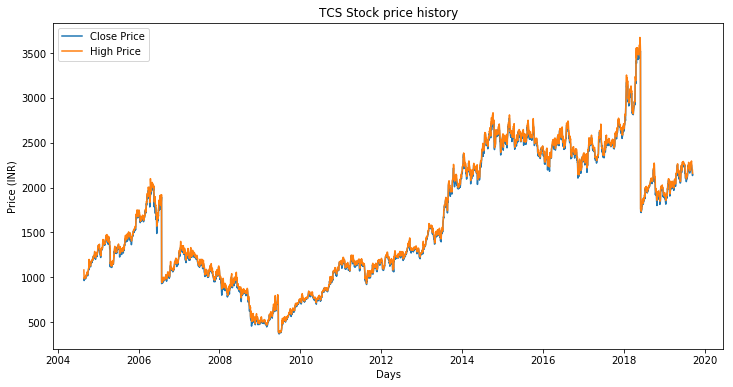

In [0]:
###
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(dataset['Close Price'])
plt.plot(dataset['High Price'])

plt.title('TCS Stock price history')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Close Price', 'High Price','No.of Shares'],loc='upper left')
plt.show()

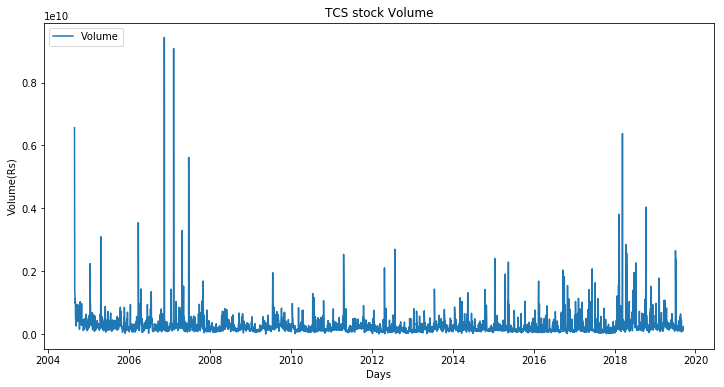

In [0]:
plt.figure(figsize=(12,6))
plt.plot(dataset['Total Turnover (Rs.)'])
plt.title('TCS stock Volume')
plt.ylabel('Volume(Rs)')
plt.xlabel('Days')
plt.legend(['Volume'], loc='upper left')
plt.show()

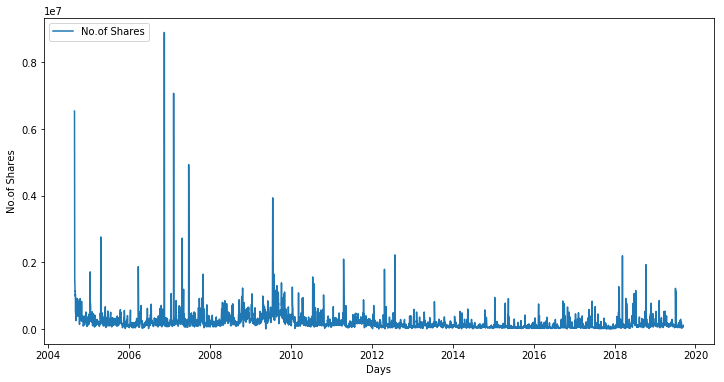

In [0]:
plt.figure(figsize=(12,6))
plt.plot(dataset['No.of Shares'])
plt.ylabel('No.of Shares')
plt.xlabel('Days')
plt.legend(['No.of Shares'], loc='upper left')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
training_cols = ['Open Price','High Price','Low Price','Close Price','Total Turnover (Rs.)','No.of Shares']
df_train, df_test = train_test_split(dataset,train_size=0.8, test_size=0.2, shuffle=False)
print("Train size = {}, Test size = {}".format(len(df_train), len(df_test)))


Train size = 2988, Test size = 747


In [0]:
df_train.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2004-08-25,1076.00,1080.00,979.00,987.50,1004.163872,6536309,121534,6563525352,1858962.0,28.44,101.00,-88.50
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016,44222,2209916859,497612.0,22.18,21.40,-14.15
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317,31798,1457351591,263508.0,17.53,23.90,-20.10
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819,23698,1105256072,220874.0,19.64,24.75,18.55
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066,19871,1114927972,282277.0,24.87,14.00,-1.05


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2988 entries, 2004-08-25 to 2016-09-02
Data columns (total 12 columns):
Open Price                   2988 non-null float64
High Price                   2988 non-null float64
Low Price                    2988 non-null float64
Close Price                  2988 non-null float64
WAP                          2988 non-null float64
No.of Shares                 2988 non-null int64
No. of Trades                2988 non-null int64
Total Turnover (Rs.)         2988 non-null int64
Deliverable Quantity         2988 non-null float64
% Deli. Qty to Traded Qty    2988 non-null float64
Spread High-Low              2988 non-null float64
Spread Close-Open            2988 non-null float64
dtypes: float64(9), int64(3)
memory usage: 303.5 KB


In [0]:
df_train.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2.988000e+03,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2988.000000,2988.000000
mean,1433.645482,1451.196235,1414.547490,1432.500569,1432.986600,2.232191e+05,7028.254685,2.563981e+08,9.262232e+04,37.145251,36.648745,-1.144913
std,644.033603,647.511058,638.994375,643.004795,642.937310,3.411010e+05,5581.115444,3.674818e+08,2.558332e+05,15.329039,21.791837,25.487172
min,360.000000,377.000000,355.250000,366.200000,368.033185,4.799000e+03,126.000000,4.166804e+06,1.476000e+03,4.840000,5.700000,-135.400000
25%,996.000000,1006.750000,980.212500,992.962500,994.639086,8.000900e+04,3798.750000,1.197575e+08,2.393875e+04,26.300000,21.800000,-14.912500
50%,1235.500000,1250.000000,1220.000000,1234.575000,1234.110186,1.500935e+05,5716.500000,1.813621e+08,5.025650e+04,34.390000,31.150000,-1.150000
75%,1971.250000,2000.525000,1940.250000,1967.662500,1965.871732,2.628092e+05,8463.000000,2.928836e+08,1.015720e+05,44.922500,44.850000,11.700000
max,2775.000000,2834.000000,2739.800000,2775.700000,2784.124508,8.893387e+06,121534.000000,9.434029e+09,8.684510e+06,98.420000,189.000000,118.250000


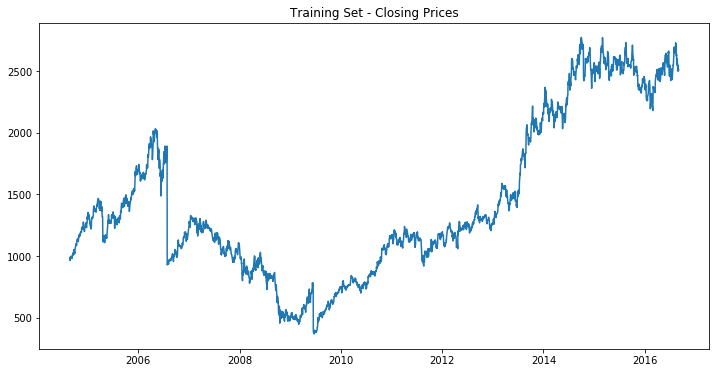

In [0]:
plt.figure(figsize=(12,6))
plt.plot(df_train['Close Price'])
plt.title('Training Set - Closing Prices')
plt.show()

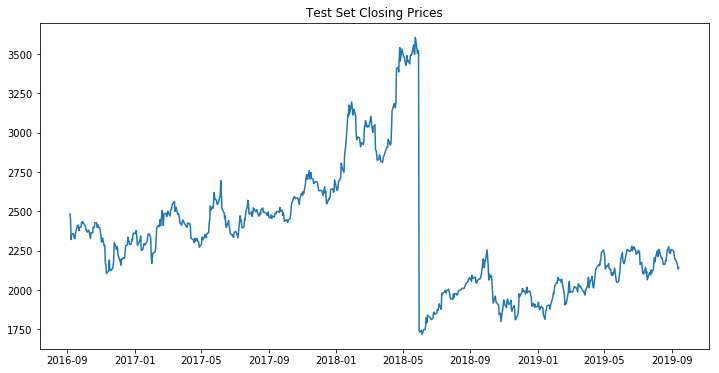

In [0]:
plt.figure(figsize=(12,6))
plt.plot(df_test['Close Price'])
plt.title('Test Set Closing Prices')
plt.show()

In [0]:
df_test.shape

(747, 12)

In [0]:
#Fature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0,1))
sc_y = MinMaxScaler(feature_range=(0,1))


In [0]:
x = df_train.loc[:,training_cols].values
y_train = df_train.loc[:,['Close Price']].values
y_train = sc_y.fit_transform(y_train)
x_train = sc.fit_transform(x)
x_test = sc.transform(df_test.loc[:,training_cols])

In [0]:
x.shape

(2988, 6)

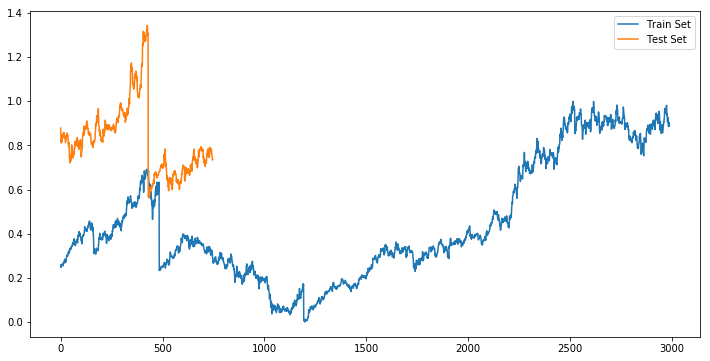

In [0]:
plt.figure(figsize=(12,6))
plt.plot(x_train[:,3])
plt.plot(x_test[:,3])
plt.legend(['Train Set','Test Set'])

In [0]:
x_train.shape

(2988, 6)

In [0]:
x_test.shape

(747, 6)

In [0]:
from tqdm import tqdm_notebook
TIME_STEPS = 60
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [0]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [0]:
import numpy as np
BATCH_SIZE = 32
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 3)
x_temp = trim_dataset(x_temp, BATCH_SIZE)
y_temp = trim_dataset(y_temp,BATCH_SIZE)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)
x_test_t = trim_dataset(x_test_t, BATCH_SIZE)
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)

#x_test_t, y_test_t = build_timeseries(x_test, 3)
#x_test_t = trim_dataset(x_test_t, BATCH_SIZE)
#y_test_t = trim_dataset(y_test_t,BATCH_SIZE)




length of time-series i/o (2928, 60, 6) (2928,)



length of time-series i/o (687, 60, 6) (687,)


In [0]:
#Creating model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger

In [0]:
BATCH_SIZE=32
TIME_STEPS=60
model = Sequential()
model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
optimizer = RMSprop(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)


In [0]:
import os
OUTPUT_PATH='.'
csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'stock-price-prediction' + '.log'), append=True)

history = model.fit(x_t, y_t, epochs=50, verbose=1, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[csv_logger])


Train on 2912 samples, validate on 320 samples
Epoch 1/50
2912/2912 [==============================] - 11s 4ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0106 - val_loss: 0.0083
Epoch 3/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 4/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0072 - val_loss: 0.0080
Epoch 5/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0065 - val_loss: 0.0077
Epoch 6/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0077
Epoch 7/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 8/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0038 - val_loss: 0.0072
Epoch 9/50
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0033 - val_loss: 0.0072
Epoch 10/50
2912/2912 [===

In [0]:
model.save('TCS-Stock-price-model.h5')

In [0]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 50, return_sequences = True, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2])))
regressor.add(Dropout(0.2))
#batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2])
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
#regressor.fit(x_t, y_t, epochs = 100, batch_size = 32)

In [0]:
model.load_weights('TCS-Stock-price-model.h5')
#model.load_weights()
predicted_stock_price = model.predict(x_test_t)
!ls -ltr

total 810
-rw------- 1 root root    151 Sep 14 18:32 TCS-stock-prices-orig.gsheet
-rw------- 1 root root 341559 Sep 14 18:32 TCS-stock-prices.csv
-rw------- 1 root root   9418 Sep 15 07:04 stock-price-prediction.log
-rw------- 1 root root  95428 Sep 15 07:27 GOOG.csv
-rw------- 1 root root 381056 Sep 15 07:31 TCS-Stock-price-model.h5


In [0]:
predicted_stock_price.shape

(320, 1)

In [0]:
y_test_t.shape

(320, 1)

In [0]:
y_test_t = y_test_t.reshape(y_test_t.shape[0],1)

In [0]:
#predicted_stock_price.shape
predicted_stock_price = sc_y.inverse_transform(predicted_stock_price)
y_test_t = sc_y.inverse_transform(y_test_t)

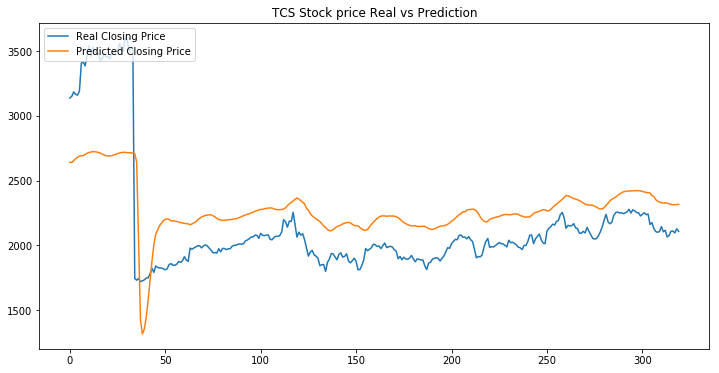

In [0]:
plt.figure(figsize=(12,6))
plt.plot(y_test_t)
plt.plot(predicted_stock_price)
#plt.plot(predicted_stock_price)
plt.title('TCS Stock price Real vs Prediction')
#plt.ylabel('Price (INR)')
#plt.xlabel('Days')
plt.legend(['Real Closing Price','Predicted Closing Price'],loc='upper left')
plt.show()


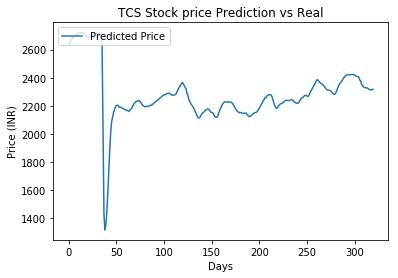

In [0]:
plt.figure()
#plt.plot(dataset['Close Price'])
plt.plot(predicted_stock_price)
plt.title('TCS Stock price Prediction vs Real')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Predicted Price'],loc='upper left')
plt.show()



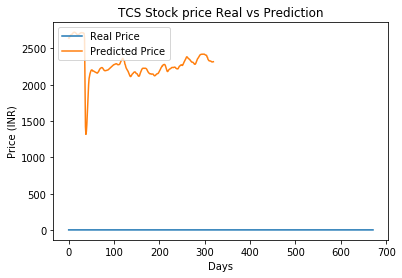

In [0]:
plt.figure()
plt.plot(y_temp)
plt.plot(predicted_stock_price)
plt.title('TCS Stock price Real vs Prediction')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Real Price','Predicted Price'],loc='upper left')
plt.show()

